In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import pandas as pd
import os

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [2]:
class multi_layer_conv:
    def __init__(self, train_df, valid_df, test_df, batch_size):
        self.train_df = train_df
        self.valid_df = valid_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.model = Sequential()
        
    
    def choose(self, item, learning_rate = 0.001):
        if item == "gradient":
            return tf.keras.optimizers.SGD(learning_rate = learning_rate)
        elif item == 'adam':
            return 'adam'
        elif item == 'binary_crossentropy':
            return 'binary_crossentropy'
        elif item == 'mean_squared_error':
            return tf.keras.losses.MeanSquaredError()

    def build_model(self, optimizer, loss, learning_rate = 0.001):
        self.model = Sequential([
            Conv2D(4, (5,5), padding = 'valid', input_shape = (28, 28, 1)),
            MaxPooling2D(),
            
            #Conv2D(32, (5,5), padding = 'valid'),
            #MaxPooling2D(),
            
            Conv2D(64, (3,3), padding = 'valid'),
            MaxPooling2D(),
            
            #Conv2D(128, (3,3), padding = 'valid'),
            #MaxPooling2D(),
            
            
            Flatten(),
            Dense(512, activation = 'relu'),
            Dense(128, activation = 'relu'),
    
            Dense(10, activation = 'softmax')
        ])
        
        self.model.summary()
        self.model.compile(optimizer = self.choose(optimizer, learning_rate),
                     loss = self.choose(loss),
                     metrics = [tf.keras.metrics.MeanSquaredError(), 'accuracy'])
        
    

In [3]:
model = multi_layer_conv("dataset/250000_Final", "dataset/250000_Final", "dataset/250000_Final", 32)
model.build_model("adam", "binary_crossentropy", 0.00316)
model.model.load_weights("dataset/checkpoints/MNIST")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        2368      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)              

4


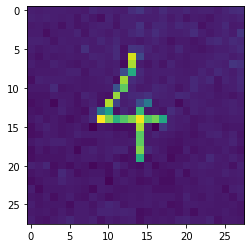

In [76]:
pic = cv2.imread("test/4.jpeg")
#plt.imshow(pic)
pic = cv2.resize(pic, [28, 28])
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
pic = cv2.bitwise_not(pic)
plt.imshow(pic)
#pic = (pic - np.min(pic)) / (np.max(pic) - np.min(pic))
pic = cv2.normalize(pic, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#pic = cv2.bitwise_not(pic)
#gray = np.invert(pic)
#gray = np.asarray(gray).astype(np.float32)
#gray -= np.min(gray)
#pic = gray/np.max(gray)
#pic = cv2.bitwise_not(pic)
#(thresh, im_bw) = cv2.threshold(pic, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#thresh = 127
#pic = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
#plt.imshow(pic)
pic = np.asarray([pic]).astype(np.float32)
print(np.argmax(model.model.predict(pic)))


# Detection In Real Time

In [79]:
vid = cv2.VideoCapture(0)
  
while(True):

    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    mid_y = frame.shape[0]/2
    mid_x = frame.shape[1]/2
    delta = 28/2
    start_point = (int(mid_x-delta), int(mid_y-delta))
    end_point = (int(mid_x + delta), int(mid_y + delta))
    new_frame = cv2.rectangle(frame, end_point, start_point, (255, 0, 0), 2)
    pic = new_frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]
    #pic = cv2.flip(pic, 1)
    
    gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    #gray = (gray - np.min(gray)) / (np.max(gray) - np.min(gray))
    gray = cv2.normalize(gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    new_gray = np.asarray([gray]).astype(np.float32)
    prediction = model.model.predict(new_gray)
    index = np.argmax(prediction)
    cv2.putText(new_frame, str(index), (int(delta), int(mid_y - 2*delta)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255))
   
    # Display the resulting frame
    cv2.imshow('Prediction', new_frame)
    

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()